# Алгоритм Гёрцеля

БИХ-фильтр Гёрцеля:

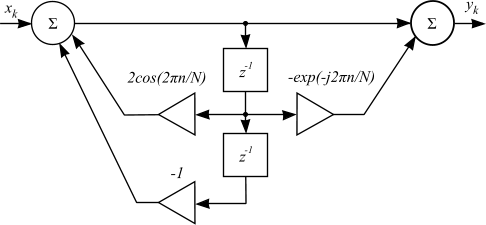

### Подключение библиотек

In [ ]:
#загружаем ThinkDSP
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
import cmath # Для работы с комплексными числами
import math
import scipy # Для сравнения с встроенной функцией
import time # Для измерения времени работы
from thinkdsp import SinSignal
import matplotlib.pyplot as plt

### Создание сигнала, состоящего из четырёх синусоид

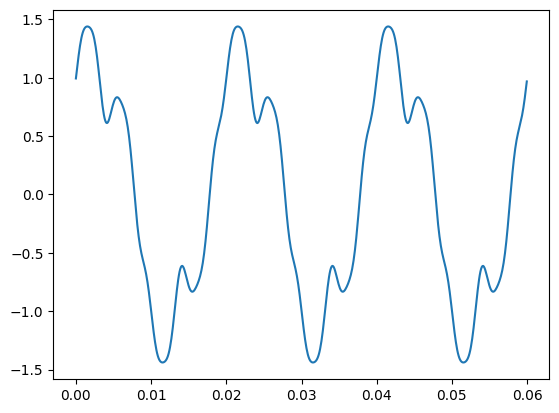

In [ ]:
PHI = [(math.pi / 4), (math.pi / 3), (-1 * math.pi / 2), 0] # Смещение
AMP = [1.25, 0.3, 0.15, 0.05] # Амплитуда
FREQ = [50, 150, 250, 450] # Частота

sig = 0;

for i in range(len(FREQ)): # Сложение синусоид
  sig = sig + SinSignal(freq = FREQ[i], amp = AMP[i], offset = PHI[i])

sig.plot()

### Исходные данные

Алгоритм реализован на следующих даных:



In [ ]:
k = [1, 3, 5, 9] # Гармоники
T = 0.02 # Период
N = 20 # Число точек на период
Ts = T / N# Период дискретизации
Fs = 1 / Ts # Частота дискретизации

На их основе заполняется массив точек:

In [ ]:
dots=[] # Массив точек
for i in range(0, N):
  dots.append(sig.evaluate(i / Fs))

### Реализация алгоритма

Расчёт коэффициентов α для каждой гармоники:

In [ ]:
alpha = [] # Альфа для каждой гармоники
for i in range(len(k)):
  alpha.append(2 * math.cos((2 * math.pi * k[i]) / N))

Итоговые вычисления:

In [ ]:
y = [] # Итоговое значение
A = []  # Амплитуда
phi = []  # Начальная фаза

for K in range(len(k)):
  v_1 = 0 # Значение на предыдущем шаге
  v_2 = 0 # Значение два шага назад
  v = 0  # Текущее значение значений
  for i in range(len(dots)):
    v = dots[i] + alpha[K] * v_1 - v_2
    v_2 = v_1
    temp = complex(v * cmath.cos(2 * cmath.pi * k[K] / N) - v_1,
                v * cmath.sin(2 * cmath.pi * k[K] / N))
    v_1 = v
  y.append(temp)
  A.append(abs(y[K]) * (2 / N)) # Амплитуда составляющих
  phi.append(math.atan2(y[K].imag, y[K].real) + math.pi / 2) # Смещение составляющих

print(y)
print("\n Амплитуды: ", A)
print("\n Смещения: ", phi)

[(8.838834764831837-8.838834764831823j), (2.598076211353315-1.5000000000000016j), (-1.4999999999999996+1.5543122344752192e-15j), (-1.3322676295501878e-15-0.5000000000000001j)]

 Амплитуды:  [1.2499999999999982, 0.30000000000000004, 0.14999999999999997, 0.05000000000000002]

 Смещения:  [0.7853981633974491, 1.047197551196597, 4.712388980384689, -2.6645352591003757e-15]


Из результатов видно, что амплитуды и смещения при создании сигнала совпадают с полученными при расчётах

### Использование алгоритма с неиспользуемыми гармониками:

In [ ]:
k1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Гармоники
alpha1 = [] # Альфа для каждой гармоники
for i in range(len(k1)):
  alpha1.append(2 * math.cos((2 * math.pi * k1[i]) / N))

y1 = [] # Итоговое значение
A1 = []  # Амплитуда
phi1 = []  # Начальная фаза

for K in range(len(k1)):
  v_1 = 0 # Значение на предыдущем шаге
  v_2 = 0 # Значение два шага назад
  v = 0  # Текущее значение значений
  for i in range(len(dots)):
    v = dots[i] + alpha1[K] * v_1 - v_2
    v_2 = v_1
    temp = complex(v * cmath.cos(2 * cmath.pi * k1[K] / N) - v_1,
                v * cmath.sin(2 * cmath.pi * k1[K] / N))
    v_1 = v
  y1.append(temp)
  A1.append(round(abs(y1[K]) * (2 / N),5)) # Амплитуда составлчющих
  phi1.append(round((math.atan2(y1[K].imag, y1[K].real) + math.pi / 2),5)) # Смещение составляющих

print(y1)
print("\n Амплитуды: ", A1)
print("\n Смещения: ", phi1)

[(8.838834764831837-8.838834764831823j), (-5.75578016893936e-15-1.7619463457015678e-15j), (2.598076211353315-1.5000000000000016j), (-1.087838028129711e-15-2.3229466526434735e-15j), (-1.4999999999999996+1.5543122344752192e-15j), (4.263445090024158e-16-1.05588484211067e-15j), (7.966483589011359e-16-1.7963785889362148e-16j), (6.4993587914338e-16-3.915436323781262e-16j), (-1.3322676295501878e-15-0.5000000000000001j), -5.652740796250625e-16j]

 Амплитуды:  [1.25, 0.0, 0.3, 0.0, 0.15, 0.0, 0.0, 0.0, 0.05, 0.0]

 Смещения:  [0.7854, -1.27374, 1.0472, -0.43797, 4.71239, 0.38376, 1.34901, 1.02859, -0.0, 0.0]


Из результатов видно, что при расчётах с неиспользуемыми гармониками, амплитуда равна нулю, значит гармоника не является частью сигнала

Гистограмма амплитуд по гармоникам:

<BarContainer object of 10 artists>

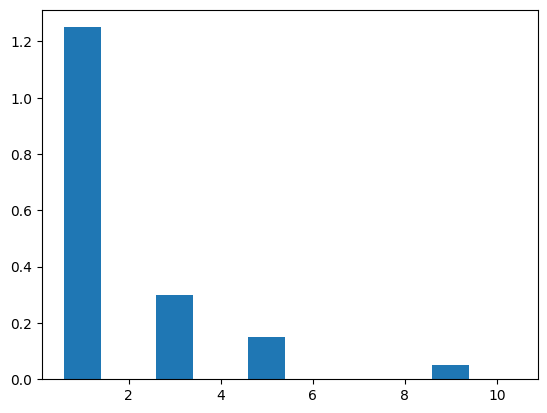

In [ ]:
plt.bar(k1,A1)

## Расчёт встроенной функцией

Сравним результаты вычислений реализованного алгоритма Гёрцеля и встроенного алгоритма FFT(Кули-Тьюки)

[-3.33066907e-16-0.00000000e+00j  8.83883476e+00-8.83883476e+00j
 -1.11022302e-15-1.11022302e-16j  2.59807621e+00-1.50000000e+00j
 -1.33226763e-15-3.10862447e-15j -1.50000000e+00+8.88178420e-16j
  4.44089210e-16-4.44089210e-16j  8.88178420e-16+6.66133815e-16j
  1.11022302e-15+7.77156117e-16j  0.00000000e+00-5.00000000e-01j
 -3.33066907e-16-0.00000000e+00j  0.00000000e+00+5.00000000e-01j
  1.11022302e-15-7.77156117e-16j  8.88178420e-16-6.66133815e-16j
  4.44089210e-16+4.44089210e-16j -1.50000000e+00-8.88178420e-16j
 -1.33226763e-15+3.10862447e-15j  2.59807621e+00+1.50000000e+00j
 -1.11022302e-15+1.11022302e-16j  8.83883476e+00+8.83883476e+00j]


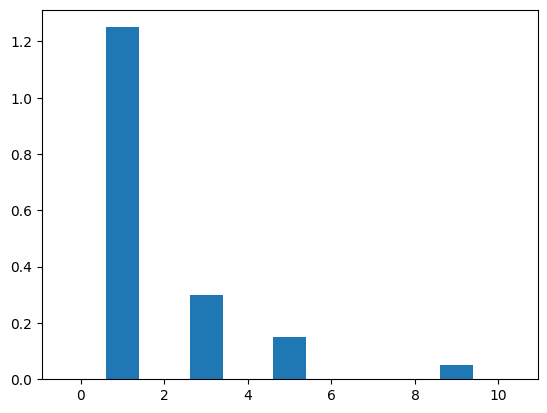

In [ ]:
k2=[0,1,2,3,4,5,6,7,8,9,10]
yf = scipy.fft.fft(dots)
A2=[]

for i in range(len(k2)):
  A2.append(round(abs(yf[i]) * (2 / N),5)) # Амплитуда составлчющих

plt.bar(k2,A2)
print

## Сравнение времени работы

In [ ]:
elapsed_time = []

Алгоритм Гёрцеля

In [ ]:
k1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Гармоники
alpha1 = [] # Альфа для каждой гармоники

y1 = [] # Итоговое значение
A1 = []  # Амплитуда
phi1 = []  # Начальная фаза

start_time = time.time() # Начало замера

for i in range(len(k1)):
  alpha1.append(2 * math.cos((2 * math.pi * k1[i]) / N))

for K in range(len(k1)):
  v_1 = 0 # Значение на предыдущем шаге
  v_2 = 0 # Значение два шага назад
  v = 0  # Текущее значение значений
  for i in range(len(dots)):
    v = dots[i] + alpha1[K] * v_1 - v_2
    v_2 = v_1
    temp = complex(v * cmath.cos(2 * cmath.pi * k1[K] / N) - v_1,
                v * cmath.sin(2 * cmath.pi * k1[K] / N))
    v_1 = v
  y1.append(temp)

end_time = time.time() # Окончание замера

elapsed_time.append(end_time - start_time)

Алгоритм Кули-Тьюки

In [ ]:
start_time = time.time() # Начало замера

yf = scipy.fft.rfft(dots)

end_time = time.time() # Окончание замера

elapsed_time.append(end_time - start_time)

Результаты:

In [ ]:
print("Гёрцель: ", elapsed_time[0])
print("Кули-Тьюки: ", elapsed_time[1])
print("Разница: ", elapsed_time[0] - elapsed_time[1])

Гёрцель:  0.002589702606201172
Кули-Тьюки:  0.0002696514129638672
Разница:  0.0023200511932373047
